In [323]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob, os, random
from pathlib import Path
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV

np.random.seed(0)
sns.set_style("darkgrid")

def my_covar(x, y):
    return my_mean(x * y) - my_mean(x) * my_mean(y)

def my_var(x):
    return np.nansum( (np.array(x) - my_mean(x)) ** 2) / len(x)
    
def my_mean(x):
    return np.nansum(x) / len(x)

def my_corr(x, y):
    numerator = my_covar(x, y)
    denom = np.sqrt(my_var(x)) * np.sqrt(my_var(y))
    return numerator / denom

def custom_r2(true, pred):
    rss = np.nansum((true - pred) ** 2)
    tss = np.nansum((true - my_mean(true)) ** 2)
    return 1 - (rss / tss)

def plot_price_over_time(df, symbol):
    fig, axs = plt.subplots(3, 1, figsize = (15, 9), sharex = True)
    df = df[df["symbol"] == symbol].sort_values(by = ["date"])
    print(list(df))
    axs[0].set_ylabel("Stock Price (USD)")
    axs[0].set_xlabel("Time")
    axs[0].plot(df.date, df.stockPrice, ls = "--", lw = 2, color = "black", alpha = 0.8, label = "Price")
    axs[0].legend()

    axs[1].plot(df.date, df.marketCapitalization)
    print(f"{my_corr(df.stockPrice, df.marketCapitalization) = }")
    plt.show()

def get_outlier_idxs(feature, feature_name):
    
    use_mad = True
    use_quantile = False
    ignore_pct = 0.01

    if(use_mad):
        magic_c = 0.6745
        cutoff_value = 400.0 
        mad = np.nanmedian(np.abs(feature - np.nanmedian(feature)))
        mi_feature = (magic_c * (feature - np.nanmedian(feature))) / mad
        outliers = np.where(np.abs(mi_feature) >= cutoff_value)[0]
        print(f"{feature_name} Found {len(outliers)} outliers out of {feature.shape[0]} -- {len(outliers) / feature.shape[0] * 100: .2f}%")
    

    elif(use_quantile):
        lower = np.nanquantile(feature, ignore_pct)
        upper = np.nanquantile(feature, 1 - ignore_pct) 
        outliers = np.where((feature >= upper) | (feature <= lower))[0]
        print(f"{feature_name} Found {len(outliers)} outliers out of {feature.shape[0]} -- {len(outliers) / feature.shape[0] * 100: .2f}%")

    return outliers


x = [123, 4, 1, 2 ,4, 2]
y = [1, 2, 3, 4, 5, 6]
x = np.array(x)
y = np.array(y)

# print(my_var(x))
# print(my_corr(x, y))

# print(np.corrcoef(x, y))
# print(r2_score(x, y))
# print(custom_r2(x, y))
# corr = covar(x, y) / std(x) * std(y)

In [324]:
df = pd.read_parquet("/Users/lselig/selig-fa/finance/.data/evs_ratios.parquet")
# df["year"] = pd.DatetimeIndex(df["date"]).year
# df = df[df.symbol.isin(["AAPL", "GOOGL", "MSFT", "GME", "A", "QQQ", "AMZN", "TSLA"])]
# df = df[df.year >= 2015]
df = df[(df.stockPrice >= 2) & (df.stockPrice <= 1000)]
remove_me = []
for col in list(df):
    num_na = df[col].isna().sum().sum()
    print(col, num_na)
    if(num_na > 30000):
        remove_me.append(col)

df = df.drop(columns = remove_me)
df = df.dropna()
print(df.shape)
# plt.scatter(df.stockPrice * df.numberOfShares, df.marketCapitalization)
# plt.show()

# plot_price_over_time(df, "MSFT")

meta_cols = ["year", "symbol", "date", "quarter", "cik"]
drop_me_experimental = ["priceEarningsToGrowthRatio", "numberOfShares", 
                        "quickRatio", "daysOfSalesOutstanding", 
                        "effectiveTaxRate", "freeCashFlowOperatingCashFlowRatio"]
df = df.drop(columns = meta_cols)
df = df.drop(columns = drop_me_experimental)
features = df
ignore_me = ["buySellRatio", "totalBought", "totalSold",
             "averageBought", "averageSold", "pPurchases",
             "sSales", "purchases", "sales"]
# ignore_me = ignore_me + ignore_me_experimental

symbol 0
date 0
stockPrice 0
numberOfShares 0
marketCapitalization 0
minusCashAndCashEquivalents 0
addTotalDebt 0
enterpriseValue 0
quarter 0
currentRatio 13145
quickRatio 13145
cashRatio 13145
daysOfSalesOutstanding 6394
daysOfInventoryOutstanding 43968
operatingCycle 44233
daysOfPayablesOutstanding 43968
cashConversionCycle 44233
grossProfitMargin 6394
operatingProfitMargin 6394
pretaxProfitMargin 6394
netProfitMargin 6394
effectiveTaxRate 5916
returnOnAssets 17
returnOnEquity 1793
returnOnCapitalEmployed 13153
netIncomePerEBT 5916
ebtPerEbit 27793
ebitPerRevenue 6394
debtRatio 17
debtEquityRatio 1793
longTermDebtToCapitalization 36222
totalDebtToCapitalization 74639
interestCoverage 49914
cashFlowToDebtRatio 34517
companyEquityMultiplier 1793
receivablesTurnover 14572
payablesTurnover 23699
inventoryTurnover 77509
fixedAssetTurnover 13090
assetTurnover 17
operatingCashFlowPerShare 489
freeCashFlowPerShare 489
cashPerShare 489
payoutRatio 438
operatingCashFlowSalesRatio 6394
freeCash

stockPrice Found 0 outliers out of 115414 --  0.00%
[]
marketCapitalization Found 139 outliers out of 115414 --  0.12%
[  3021   3022   3024   3025   3026   3027   3028   3029   3030   3031
   3032   3033   3034   3035   3036   3037  15245  15246  15247  15248
  15249  15250  15251  15253  15254  15255  15256  15257  15258  15259
  15260  15261  15262  15263  15264  15265  15266  16617  16618  16619
  17626  17658  17659  25155  25156  27109  27110  27111  27112  27113
  27114  27792  27793  27794  37164  41872  41873  41874  50711  50712
  50714  50715  50716  50717  50718  50719  50720  50721  50722  50723
  50724  50725  50726  50727  52284  52285  52286  58680  64372  64373
  64374  66855  66857  66858  66860  66861  66862  66863  66864  66865
  66866  66867  66868  66869  66870  66871  66872  66873  69196  81201
  81202  81203  81204  81205  81206  81207  81208  81209  81210  81211
  81212  81213  81214  81215  81216  90079  90080  90081  91135  91136
  94506  94957  97860  97861 

/var/folders/xd/70hsmb4x1798qcyzb8hw9_n40000gp/T/ipykernel_4532/114778520.py:58: RuntimeWarning: divide by zero encountered in divide
  mi_feature = (magic_c * (feature - np.nanmedian(feature))) / mad
/var/folders/xd/70hsmb4x1798qcyzb8hw9_n40000gp/T/ipykernel_4532/114778520.py:58: RuntimeWarning: invalid value encountered in divide
  mi_feature = (magic_c * (feature - np.nanmedian(feature))) / mad


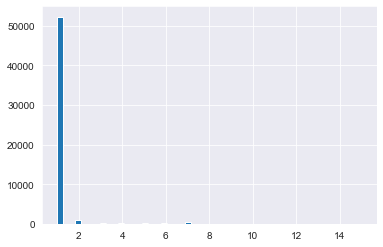

False 1
False 2
False 1
False 2
False 1
False 2
False 2
False 2
False 2
False 2
False 2
False 2
False 2
False 2
False 2
False 2
False 2
False 2
False 2
True 3
False 2
True 3
True 3
True 3
True 4
True 4
True 3
True 3
True 3
True 3
True 3
True 3
True 3
True 3
True 3
True 3
True 3
True 11
True 6
True 9
True 12
True 10
True 11
True 5
True 5
False 1
False 1
False 1
False 2
False 2
False 1
True 12
True 12
True 13
True 5
True 12
True 12
True 12
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 2
False 2
False 2
False 2
False 2
False 2
False 2
False 2
False 2
True 11
True 3
True 9
True 12
True 13
True 12
True 11
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 2
False 2
False 2
False 2
False 2
False 2
False 2
False 2
False 2
True 13
False 2
True 3
False 2
True 3
True 3
True 3
True 3
True 3
True 3
True 3
True 3
True 3
True 3
True 3
True 3
True 3
True 13
True 13
True 13
True 8
True 6
False 1
True 12
True 7
True 8
True 6
True 12
True 3
True 11
True 12
True 12
True

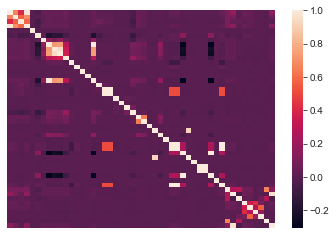

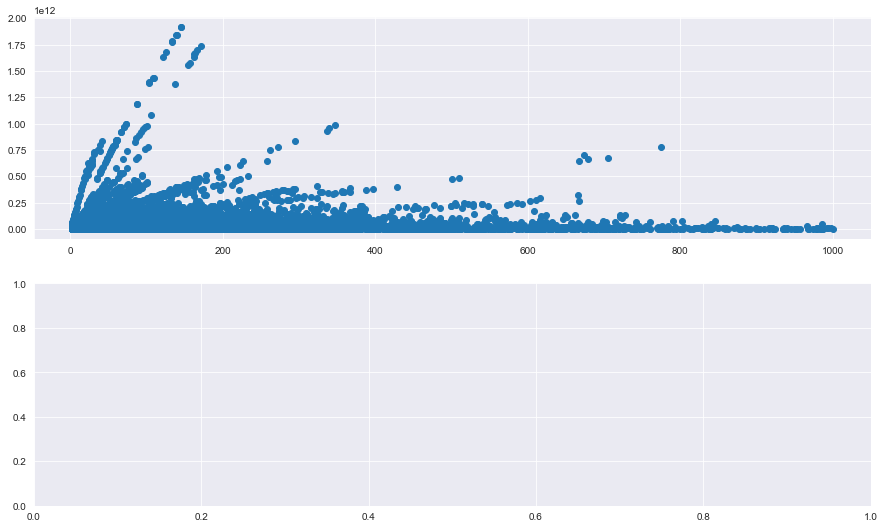

In [325]:
outlier_idxs = []
majority_outliers = {}
for i, feature in enumerate(features):
    # print(f"{feature = } -- {np.corrcoef(features[feature].values, labels)[0, 1]:.4f}")
    if(feature not in ignore_me):
        result = get_outlier_idxs(features[feature].values, feature)
        for idx in result:
            if(idx not in majority_outliers):
                majority_outliers[idx] = 1
            else:
                majority_outliers[idx] += 1

        print(result)
        outlier_idxs.append(result)

lives = 3
remove_me = []
plt.hist(majority_outliers.values(), bins = 50)
plt.show()
for key in majority_outliers:
    print(majority_outliers[key] >= lives, majority_outliers[key])
    if(majority_outliers[key] >= lives):
        remove_me.append(key)
        
# remove_me = set().union(*outlier_idxs)
print(f"Killing {len(remove_me)} rows out of {len(features)}")
bad_idx = list(remove_me)

labels = df["stockPrice"].values
df = df.reset_index(drop = True)
bad_df = df.index.isin(bad_idx)
df = df[~bad_df]

print(df.shape)
labels = df.stockPrice
features = df.drop(columns = ["stockPrice"])
corr = features.corr()
sns.heatmap(corr, annot = False, xticklabels=False, yticklabels=False)
plt.show()
fig, axs = plt.subplots(2, 1, figsize = (15, 9))
axs[0].scatter(df.stockPrice, df.marketCapitalization)
# %matplotlib widget
# plt.hist(df.stockPrice)


In [ ]:

for i, feature in enumerate(features):
    print(f"{feature = } -- {np.corrcoef(features[feature].values, labels)[0, 1]:.4f}")
    plt.scatter(features[feature], labels)
    plt.show()
    # if(feature not in ignore_me):
    #     result = get_outlier_idxs(features[feature].values, feature)
    #     print(result)

In [321]:
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size = 0.8)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_train = y_train.values.reshape(-1, 1)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

scaler_X.fit(X_train)
scaler_y.fit(y_train)

X_train = scaler_X.transform(X_train)
y_train = scaler_y.transform(y_train)
X_test = scaler_X.transform(X_test)

# print(y_train[:5])
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred)
print(y_test[:20].values)

print(y_pred[:20])

my_r2 = r2_score(y_test, y_pred)
my_mae = mean_absolute_error(y_test, y_pred)
my_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
my_mape = np.sqrt(mean_absolute_percentage_error(y_test, y_pred))
print(f"{my_r2 = }")
print(f"{my_mae = }")
print(f"{my_rmse = }")
print(f"{my_mape = }")

(60182, 48) (15046, 48) (60182,) (15046,)
[ 12.54        6.84      136.8399963  25.870001   42.9300003  13.2600002
  25.5699997 145.7400055  18.1900005  31.19       39.9300003  30.3099995
  11.         39.7299995  11.74       21.4699993  22.24       22.3099995
   6.577778   21.639999 ]
[[27.52483931]
 [33.03719742]
 [77.47340268]
 [34.94990576]
 [58.39749233]
 [51.27299526]
 [16.38348112]
 [40.60791192]
 [25.75480029]
 [23.62661207]
 [37.94133316]
 [28.85353782]
 [18.30318633]
 [47.2069134 ]
 [ 6.10758239]
 [19.80128504]
 [29.06877736]
 [42.78831712]
 [11.52240511]
 [16.41210012]]
my_r2 = 0.36301309566214446
my_mae = 15.424814785651703
my_rmse = 28.349005564040507
my_mape = 0.9403126940898142


In [ ]:
plt.close()
%matplotlib inline
plt.hist2d(y_test.values, y_pred.flatten(), bins = 400)
plt.show()

In [322]:
model = Ridge()
cv = 10
alphas_ = [10 ** i for i in range(-5, 5)]
print(alphas_)
param_grid = {"alpha": alphas_}
search = GridSearchCV(model, param_grid, scoring = "r2", n_jobs = -1, cv=cv, verbose = 3)
result = search.fit(X_train, y_train)
alpha_opt = search.best_params_["alpha"]

print(f"{alpha_opt = }")
print(f"{result.cv_results_['mean_test_score']}")

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 9/10] END .....................alpha=1e-05;, score=-1.495 total time=   0.0s
[CV 10/10] END .....................alpha=1e-05;, score=0.370 total time=   0.0s
[CV 7/10] END ......................alpha=1e-05;, score=0.396 total time=   0.0s
[CV 4/10] END ......................alpha=1e-05;, score=0.419 total time=   0.0s
[CV 5/10] END ......................alpha=1e-05;, score=0.392 total time=   0.0s
[CV 1/10] END ....................alpha=1e-05;, score=-18.381 total time=   0.0s
[CV 6/10] END ......................alpha=1e-05;, score=0.429 total time=   0.0s
[CV 8/10] END ......................alpha=1e-05;, score=0.420 total time=   0.0s
[CV 2/10] END ......................alpha=1e-05;, score=0.367 total time=   0.0s
[CV 3/10] END ......................alpha=1e-05;, score=0.432 total time=   0.0s
[CV 1/10] END ...................alpha=0.0001;, score=-18.372 total 

In [ ]:
model = SGDRegressor()
cv = 10
param_grid = {"alpha": [0.0001, 0.001, 0.01],
              "learning_rate": ["invscaling", "optimal", "adaptive"],
              "tol": [1e-4, 1e-3, 1e-2],
              "penalty": ["l2", "l1", "elastic_net"]}

search = GridSearchCV(model, param_grid, scoring = "r2", n_jobs = -1, cv=cv, verbose = 1)
result = search.fit(X_train, y_train.ravel())
print(f"{result.cv_results_['mean_test_score']}")